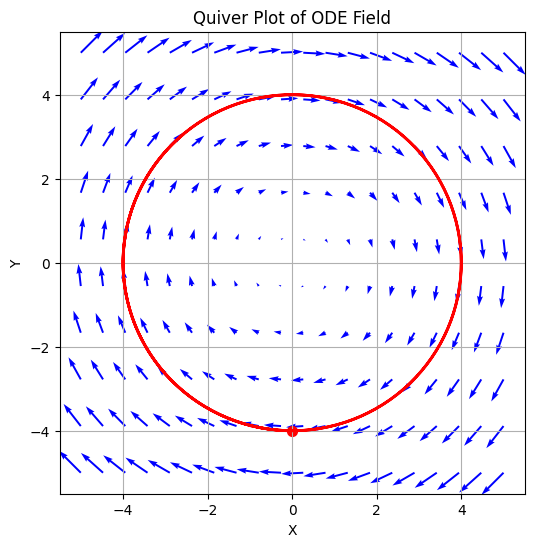

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define your ODE function (example: simple system)
def my_ode(t, y):
    dxdt = y[1]  # Example dx/dt
    dydt = -y[0]  # Example dy/dt
    return np.array([dxdt, dydt])

# Define grid range
x_vals = np.linspace(-5, 5, 20)
y_vals = np.linspace(-5, 5, 10)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute derivatives at each grid point
U = np.zeros_like(X)
V = np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        U[i, j], V[i, j] = my_ode(0, [X[i, j], Y[i, j]])

t_span = (0, 15)  # Time range
initial_condition = [0, -4]  # Starting point (x0, y0)
t_eval = np.linspace(0, 15, 300)  # Time points for output

sol = solve_ivp(my_ode, t_span, initial_condition, t_eval=t_eval)

# Plot the quiver plot
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, U, V, color="blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Quiver Plot of ODE Field")
plt.plot(sol.y[0], sol.y[1], 'r-', linewidth=2, label="Trajectory")  # Solution trajectory
plt.scatter([initial_condition[0]], [initial_condition[1]], color='red', s=50, label="Start")  # Mark the start
plt.grid()
plt.show()